In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_moons(X, y, mlmodel):
    x1sup, x2sup = np.max(X, 0) * 1.1
    x1inf, x2inf = np.min(X, 0) * 1.1
    x1, x2 = np.mgrid[x1inf:x1sup:0.01, x2inf:x2sup:0.01]
    y_pred = np.argmax(mlmodel.predict(np.c_[x1.ravel(), x2.ravel()]), axis=1)
    y_pred = y_pred.reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap="Dark2", alpha=0.5)
    plt.scatter(*X.T, c=y, cmap="Dark2")

#### Making training and test datasets

In [28]:
X_train, y_train = make_moons(n_samples=1000, noise=0.3, random_state=31415)
X_test, y_test = make_moons(n_samples=300, noise=0.3, random_state=31415)

## 3-Hidden-Layer Neural Network
### Under a sequential model

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

model = Sequential()
# The number of input units must be explicitly specified 
model.add(Dense(30, activation="relu", input_dim=2))
model.add(Dense(40, activation="relu"))
model.add(Dense(70, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

y_train_cat = to_categorical(y_train)
model.fit(X_train, y_train_cat, epochs=200,  verbose=0)
model.evaluate(X_train, y_train_cat)

1000/1000 [==============================] - 0s 230us/step


[0.20257281821966172, 0.907]

In [50]:
y_test_cat = to_categorical(y_test)
model.evaluate(X_test, y_test_cat)

300/300 [==============================] - 0s 39us/step


[0.1992085137963295, 0.9300000007947286]

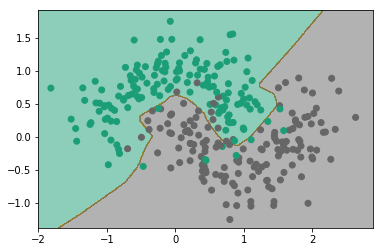

In [51]:
plot_moons(X_test, y_test, model)

## 3-Hidden-Layer Neural Network
### Under the keras functional API

In [60]:
from keras.models import Model
from keras.layers import Input, Dense

# Specify the architecture of the neural network
inputs = Input(shape=(2,))
# 30, 40, 70, 2
x = Dense(30, activation="relu")(inputs)
x = Dense(40, activation="relu")(x)
x = Dense(70, activation="relu")(x)
outputs = Dense(2, activation="softmax")(x)

# Create an instance of our model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model and specify its training
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model with the specifications above
model.fit(X_train, y_train_cat, epochs=150, verbose=0)
model.evaluate(X_train, y_train_cat)

1000/1000 [==============================] - 0s 301us/step


[0.20930433893203734, 0.908]

300/300 [==============================] - 0s 30us/step


[0.19750672250986098, 0.9233333333333333]

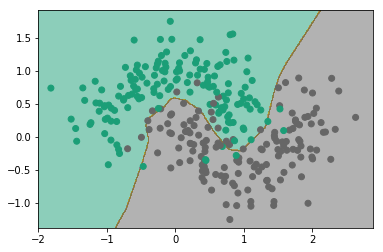

In [61]:
plot_moons(X_test, y_test, model)
model.evaluate(X_test, y_test_cat)